## Tema5. Entendimiento de los Datos

In [49]:
## Tema3. Importación y Conexión a Base de Datos#Importando librerías necesarias
import os
import pandas as pd
import numpy as np
import seaborn as sns    #Librería Gráfica
import matplotlib.pyplot as plt #Librería Gráfica
from sklearn.model_selection import train_test_split #Particionamiento de Datos
from sklearn.preprocessing import LabelEncoder #Para codificación de etiquetas
from collections import defaultdict #Para generar un valor de un campo clave de un diccionario por defecto

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Estableciendo mi directorio de trabajo
os.chdir(r"D:\Especializacion Python 19\Data")

In [3]:
#Cargando nuestro archivo de trabajo
miarchivo="MarketingDirecto.csv"
mark=pd.read_csv(miarchivo,sep=",")
mark.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304


In [4]:
#Obteniendo las dimensiones del DataFrame
mark.shape

(1000, 10)

In [5]:
#Mostrar si existe al menos un valor nulo en toda la data
mark.isnull().any().any()

True

In [6]:
#Mostrar si existe al menos un valor nulo en cara variable
mark.isnull().any()

Edad         False
Genero       False
Vivienda     False
Ecivil       False
Ubicacion    False
Salario      False
Hijos        False
Historial     True
Catalogos    False
Monto        False
dtype: bool

In [7]:
mark.isnull().sum()/len(mark)*100

Edad          0.0
Genero        0.0
Vivienda      0.0
Ecivil        0.0
Ubicacion     0.0
Salario       0.0
Hijos         0.0
Historial    30.3
Catalogos     0.0
Monto         0.0
dtype: float64

In [8]:
#Creando una nueva columna que identifique en que filas existe un NA
mark["ValorNulo"]=mark["Historial"].isnull()
mark.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto,ValorNulo
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755,False
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318,False
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296,False
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436,False
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304,False


In [9]:
#Eliminando filas con valores nulos
mark2=mark.loc[mark.ValorNulo==False]
mark2.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto,ValorNulo
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755,False
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318,False
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296,False
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436,False
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304,False


In [10]:
print(mark.shape)
print(mark2.shape)

(1000, 11)
(697, 11)


In [11]:
#Volviendo a cargar nuestro archivo de trabajo
miarchivo="MarketingDirecto.csv"
mark=pd.read_csv(miarchivo,sep=",")
mark.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304


In [12]:
mark.dtypes

Edad         object
Genero       object
Vivienda     object
Ecivil       object
Ubicacion    object
Salario       int64
Hijos         int64
Historial    object
Catalogos     int64
Monto         int64
dtype: object

In [13]:
#Calcular el número de variables por tipo
mark.columns.to_series().groupby(mark.dtypes).size()

int64     4
object    6
dtype: int64

In [14]:
#Agrupando las variables por su tipo
tipos=mark.columns.to_series().groupby(mark.dtypes).groups
tipos

{int64: ['Salario', 'Hijos', 'Catalogos', 'Monto'], object: ['Edad', 'Genero', 'Vivienda', 'Ecivil', 'Ubicacion', 'Historial']}

In [16]:
#Armando una lista de columnas categóricas
colcat= tipos[np.dtype('object')].to_list()
print(len(colcat))
print(colcat)

#Armando una lista de columnas numéricas
colnum= tipos[np.dtype('int64')].to_list()
print(len(colnum))
print(colnum)

6
['Edad', 'Genero', 'Vivienda', 'Ecivil', 'Ubicacion', 'Historial']
4
['Salario', 'Hijos', 'Catalogos', 'Monto']


In [17]:
#Completando los valores faltantes para variables categóricas
for cat in colcat:
    moda=mark[cat].mode()[0]
    mark[cat]=mark[cat].fillna(moda)

In [18]:
#Nueva Verificación de los NAs en el DF
mark.isnull().any().any()

False

In [20]:
#Nueva Verificación de los NAs a nivel de variables
#mark.isnull().mean()*100
mark.isnull().sum()/len(mark)*100

Edad         0.0
Genero       0.0
Vivienda     0.0
Ecivil       0.0
Ubicacion    0.0
Salario      0.0
Hijos        0.0
Historial    0.0
Catalogos    0.0
Monto        0.0
dtype: float64

**_Interactuando con una Variable Cualitativa_**

In [22]:
#Contabilizando frecuencias absolutas de una variable
civil_freq=pd.value_counts(mark.Ecivil)
civil_freq

Casado     502
Soltero    498
Name: Ecivil, dtype: int64

In [23]:
#Contabilizando frecuencias absolutas de una variable
civil_freq2=mark.groupby("Ecivil").size()
civil_freq2

Ecivil
Casado     502
Soltero    498
dtype: int64

In [24]:
#Verificando los tipos de objetos
print(type(civil_freq))
print(type(civil_freq2))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [27]:
#Ejemplificar la primera categoria
print(civil_freq[0])
str(round((civil_freq[0]/civil_freq.sum())*100,1))+"%"

502


'50.2%'

In [30]:
labels=[str(round((x/civil_freq.sum())*100,1))+"%" for x in civil_freq]
labels

['50.2%', '49.8%']

In [31]:
labels[0]="Casado "+labels[0]
labels[1]="Soltero "+labels[1]
labels

['Casado 50.2%', 'Soltero 49.8%']

**_Graficos de Pie(Sectores)_**

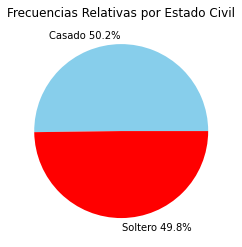

In [36]:
plt.pie(civil_freq,labels=labels,colors=['skyblue','red'])
plt.title("Frecuencias Relativas por Estado Civil")
plt.show()

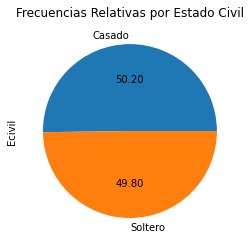

In [37]:
#Método Alternativo
civil_freq.plot(kind='pie',autopct='%.2f',
               title="Frecuencias Relativas por Estado Civil")
plt.show()

**_Graficos de Barra_**

In [38]:
#Categorizando la variable Salario
#bins no toma los extremos
mark['salario_cat']=pd.cut(mark.Salario,bins=[mark.Salario.min()-1,30000,100000,mark.Salario.max()+1])
pd.value_counts(mark.salario_cat)

(30000, 100000]     653
(10099, 30000]      250
(100000, 168801]     97
Name: salario_cat, dtype: int64

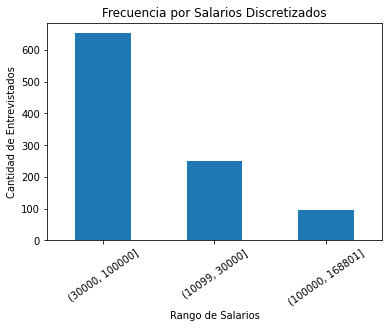

In [40]:
#Creando el gráfico de barras desde pandas
plot= pd.value_counts(mark.salario_cat).plot(kind='bar',
                                            title='Frecuencia por Salarios Discretizados',rot=35)
plot.set_ylabel('Cantidad de Entrevistados')
plot.set_xlabel('Rango de Salarios')
plt.show()

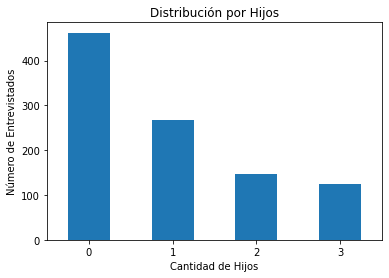

In [47]:
#Gráfico de Barra para el Número de Hijos
mark.groupby('Hijos').size().plot(kind='bar',rot=0)
plt.title('Distribución por Hijos')
plt.xlabel('Cantidad de Hijos')
plt.ylabel('Número de Entrevistados')
plt.show()

**_Graficos de Boxplot_**

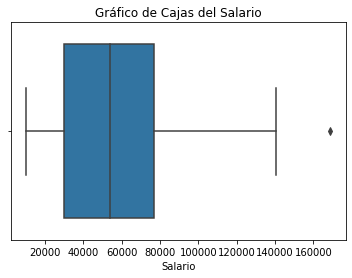

In [50]:
sns.boxplot(mark.Salario)
plt.title('Gráfico de Cajas del Salario')
plt.show()

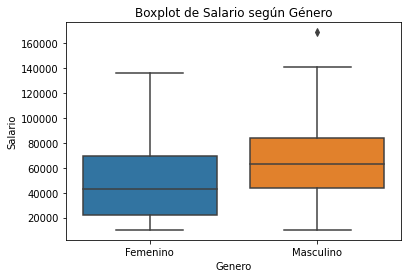

In [51]:
sns.boxplot(x=mark.Genero, #La variable categorizadora o separadora
            y=mark.Salario) #La variable cuantitativa de rpta
plt.title('Boxplot de Salario según Género')
plt.show()

**_Graficos de Histograma_**

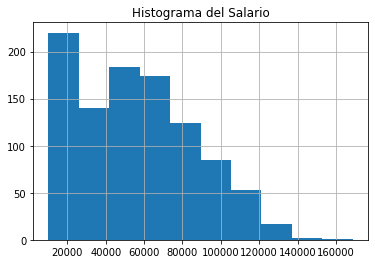

In [52]:
mark.Salario.hist()
plt.title("Histograma del Salario")
plt.show()

**_Graficos de Dispersión_**

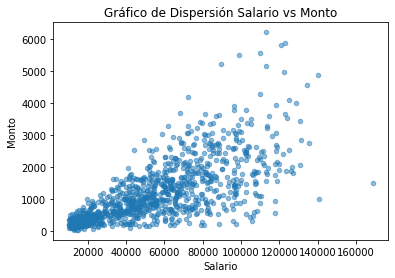

In [54]:
mark.plot.scatter(x='Salario',
                 y='Monto',
                 alpha=0.5)
plt.title('Gráfico de Dispersión Salario vs Monto')
plt.show()

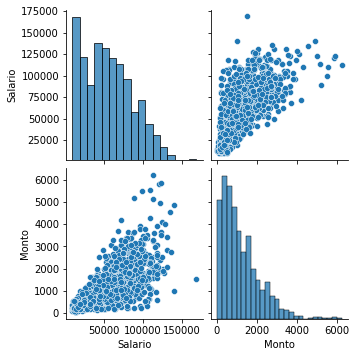

In [55]:
#Gráfico de Dispersión entre pares
cols=['Salario','Monto']
sns.pairplot(mark[cols])
plt.show()

In [56]:
mifile="bank.csv"
df_bank=pd.read_csv(mifile,sep=";")
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**_Codificando Variables_**

### Entendiendo el LabelEncoder

In [61]:
#Instanciamos el objeto encoder
encoder=LabelEncoder()
#Aprender de las categorías listadas (valores)
encoder.fit(['Soltero','Soltero','Casado','Viudo','Divorciado','Divorciado'])
print(encoder.classes_)
#De lo aprendido, transformo a los códigos
encoder.transform(['Soltero','Viudo','Viudo','Divorciado','Casado'])
#Si tuviésemos en códigos podríamos transformarlo a categorías
encoder.inverse_transform([2,1,2,0,0])

['Casado' 'Divorciado' 'Soltero' 'Viudo']


array(['Soltero', 'Divorciado', 'Soltero', 'Casado', 'Casado'],
      dtype='<U10')

### Entendiendo el DefaultDict

In [62]:
versiones_lenguajes=defaultdict(lambda: '1.0.0')
versiones_lenguajes['Java']='12.0.0'
versiones_lenguajes['PHP']='7.1.2'
versiones_lenguajes['C#']='7.0.0'

In [63]:
print(versiones_lenguajes)

defaultdict(<function <lambda> at 0x000002C777C365E0>, {'Java': '12.0.0', 'PHP': '7.1.2', 'C#': '7.0.0'})


In [64]:
versiones_lenguajes['Python']
print(versiones_lenguajes)

defaultdict(<function <lambda> at 0x000002C777C365E0>, {'Java': '12.0.0', 'PHP': '7.1.2', 'C#': '7.0.0', 'Python': '1.0.0'})


In [ ]:
#Forma Clásica#
def sumatoria(x,y):
    return(x+y)

#Lambda Anónima#
suma=lambda x,y:x+y

In [68]:
d=defaultdict(LabelEncoder)
print(type(d))

print(d['job'])
print(d['marital'])

<class 'collections.defaultdict'>
LabelEncoder()
LabelEncoder()


In [69]:
#Agrupando las variables por su tipo
tipos=df_bank.columns.to_series().groupby(df_bank.dtypes).groups
tipos

{int64: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']}

In [70]:
#Extraer un listado con las variables de tipo object
list_text=list(tipos[np.dtype('object')])
list_text

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [71]:
#Estableciendo una instancia de defaultdict
d=defaultdict(LabelEncoder)

In [74]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [73]:
#fit realiza un aprendizaje de las categorías ajustando los datos encontrados
fit=df_bank.apply(lambda x: d[x.name].fit(x) if x.name in list_text else x)

#transform ejecuta lo aprendido
df_bank2=df_bank.apply(lambda x: d[x.name].transform(x) if x.name in list_text else x)
df_bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [76]:
df_bank2.shape

(4521, 17)

**Particionamiento de Datos**

In [78]:
x=df_bank2.iloc[:,0:len(df_bank2.columns)-1].values
y=df_bank2.iloc[:,len(df_bank2.columns)-1].values

xtrain,xtest,ytrain,ytest=train_test_split(x,#Matriz de Datos
                                          y, #Variable Target
                                          test_size=0.3, #Proporción del Testing DataSet
                                          random_state=2020, #Semilla
                                          stratify=y) #Criterio de Estratificación

In [79]:
len(df_bank2.index)

4521

In [81]:
print(len(xtrain))
print(len(xtest))

3164
1357


## Tema6. Limpieza de Datos

In [94]:
#Importando librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression #Para imputación por regresión.
from sklearn import tree #Para imputación por DecisionTree.
from sklearn.preprocessing import LabelEncoder #Para codificador de etiquetas.
from collections import defaultdict #Para un valor de diccionario por defecto.
from sklearn.impute import SimpleImputer #Para llevar a cabo imputaciones univariadas

### Eliminando muestras o características con valores faltantes

In [82]:
import pandas as pd
from io import StringIO
import sys

In [83]:
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [84]:
#Eliminando variables que contengan al menos un NA
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [85]:
#Eliminando las filas que contengan todas las columnas en NA
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [86]:
#Eliminando las filas que contengan al menos una columna en NA
df.dropna(how='any')

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [87]:
#Quedarse con las filas que tengan al menos "k" valores NO NAs
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [88]:
#Eliminar filas donde existan NAs en una columna o variable en particular
df.dropna(subset=['D'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0


### Imputación Univariada para Missing Values

In [89]:
fileCSV="censusn.csv"
censusn=pd.read_csv(fileCSV,sep=";")
censusn.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,39,6.0,77516,13,3,9.0,4,1,1,2174,0,40,1.0,1
1,2,50,2.0,83311,13,1,5.0,3,1,1,0,0,13,1.0,1
2,3,38,1.0,215646,9,2,7.0,4,1,1,0,0,40,1.0,1
3,4,53,1.0,234721,7,1,7.0,3,5,1,0,0,40,1.0,1
4,5,28,1.0,338409,13,1,6.0,1,5,0,0,0,40,13.0,1


In [90]:
#Eliminando la variable Unnamed: 0
censusn.drop('Unnamed: 0',axis=1,inplace=True)
censusn.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,39,6.0,77516,13,3,9.0,4,1,1,2174,0,40,1.0,1
1,50,2.0,83311,13,1,5.0,3,1,1,0,0,13,1.0,1
2,38,1.0,215646,9,2,7.0,4,1,1,0,0,40,1.0,1
3,53,1.0,234721,7,1,7.0,3,5,1,0,0,40,1.0,1
4,28,1.0,338409,13,1,6.0,1,5,0,0,0,40,13.0,1


In [91]:
#Almacenar los nombres de las variables en un objeto de tipo lista
columnas=list(censusn.columns)

In [92]:
#Porcentaje de NAs por variables
censusn.isnull().sum()*100/len(censusn)

V1     0.000000
V2     5.638647
V3     0.000000
V4     0.000000
V5     0.000000
V6     5.660146
V7     0.000000
V8     0.000000
V9     0.000000
V10    0.000000
V11    0.000000
V12    0.000000
V13    1.790486
V14    0.000000
dtype: float64

In [95]:
#Instanciamos un objeto de clase SimpleImputer
imp_mediana=SimpleImputer(strategy='median')

In [100]:
#Se aplicará a todo el DF
censusn_imputado=imp_mediana.fit_transform(censusn)
censusn_imputado=pd.DataFrame(censusn_imputado,columns=columnas)
censusn_imputado.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,39.0,6.0,77516.0,13.0,3.0,9.0,4.0,1.0,1.0,2174.0,0.0,40.0,1.0,1.0
1,50.0,2.0,83311.0,13.0,1.0,5.0,3.0,1.0,1.0,0.0,0.0,13.0,1.0,1.0
2,38.0,1.0,215646.0,9.0,2.0,7.0,4.0,1.0,1.0,0.0,0.0,40.0,1.0,1.0
3,53.0,1.0,234721.0,7.0,1.0,7.0,3.0,5.0,1.0,0.0,0.0,40.0,1.0,1.0
4,28.0,1.0,338409.0,13.0,1.0,6.0,1.0,5.0,0.0,0.0,0.0,40.0,13.0,1.0


In [101]:
#Verificando los Porcentaje de NAs por variables
censusn_imputado.isnull().sum()*100/len(censusn_imputado)

V1     0.0
V2     0.0
V3     0.0
V4     0.0
V5     0.0
V6     0.0
V7     0.0
V8     0.0
V9     0.0
V10    0.0
V11    0.0
V12    0.0
V13    0.0
V14    0.0
dtype: float64